In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('Data.csv')
statedf = pd.read_csv('State_data.csv')
funds = pd.read_csv('NCAP_Funding.csv')
funds = funds.replace('-',None)
funds['Amount released during FY 2021-22'] = funds['Amount released during FY 2021-22'].astype(float)
funds['Amount released during FY 2020-21'] = funds['Amount released during FY 2020-21'].astype(float)
funds['Amount released during FY 2019-20'] = funds['Amount released during FY 2019-20'].astype(float)
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d')

Spatial aggregation

1) Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [8]:
#1
a= data.groupby('state')['PM2.5'].mean()
b=a.idxmax()
print(b)

Delhi


2) Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [9]:
#2
specific_year = data['Timestamp'].dt.year == 2023
hazardious_PM2 =data ['PM2.5'] > 300
state_with_mosthadious= data[hazardious_PM2 & specific_year]
print(state_with_mosthadious['state'].value_counts().idxmax())

Delhi


3) Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

In [10]:
#3
highest_variability = data[specific_year].groupby('state')['PM2.5'].std()
state = highest_variability.idxmax()
print(state)

Delhi


4) Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [11]:
#4
specific_year1 = data['Timestamp'].dt.year.isin([2021,2022])
a = data[specific_year1].groupby('state')['PM2.5'].mean()
b= a.idxmin()
print(b)

Mizoram


Temporal Aggregation

1) Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [12]:
#1
data['Timestamp']= pd.to_datetime(data['Timestamp'])
specific_year2 = data['Timestamp'].dt.year == 2020
specific_month1 = data['Timestamp'].dt.month == 8
station= data[specific_month1 & specific_year2]
a = station['PM2.5'].idxmax()
data.iloc[a]['state']

'Karnataka'

2) For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?

In [13]:
#2
year = data[data['Timestamp'].dt.year == 2018]
wintermonths = [1,2,12]
summermonths = [3,4,5]
monsoonmonths = [6,7,8,9]
station = year['station']== 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'
winter2018 = (year ['Timestamp'].dt.month.isin(wintermonths)) & (station)
summer2018 = (year ['Timestamp'].dt.month.isin(summermonths)) & (station)
monsoon2018 = (year ['Timestamp'].dt.month.isin(monsoonmonths)) & (station)
avgwinter = year [winter2018]['PM2.5'].dropna().mean()
avgsummer = year [summer2018]['PM2.5'].dropna().mean()
avgmonsoon = year [monsoon2018]['PM2.5'].dropna().mean()
print(avgwinter)
print(avgsummer)
print(avgmonsoon)

67.49234436344778
nan
34.42519611317571


Some seasons are more polluted than others in general as people of India usally burst crackers during the times of diwali casuing more pollution during the period of october november month.

3) Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
a) Calculate the monthly average PM2.5 for weekdays and weekends separately
b) X-axis: Months (January to December).
c) Y-axis: Average PM2.5 levels.
d) Use two lines: one

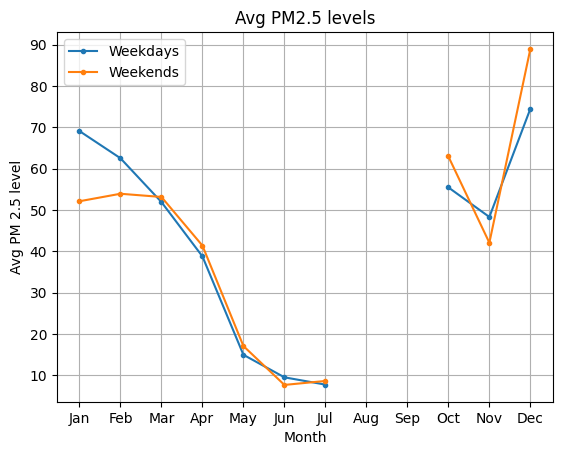

In [14]:
#3
year2021 = data[data['Timestamp'].dt.year == 2021]
station = year2021['station']== 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'
weekdays = [0,1,2,3,4]
weekends = [5,6]
months = [1,2,3,4,5,6,7,8,9,10,11,12]
avg_list_days = []
avg_list_ends = []
montharray = np.array(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for i in months:
    monthly = year2021['Timestamp'].dt.month==i
    weekdays_month = year2021['Timestamp'].dt.dayofweek.isin(weekdays) & station & monthly
    weekends_month = year2021['Timestamp'].dt.dayofweek.isin(weekends) & station & monthly
    avg_value_days = year2021[weekdays_month]['PM2.5'].mean()
    avg_value_ends = year2021[weekends_month]['PM2.5'].mean()
    avg_list_days.append(avg_value_days)
    avg_list_ends.append(avg_value_ends)
avg_array_days = np.array(avg_list_days)
avg_array_ends = np.array(avg_list_ends)
plt.plot(montharray,avg_array_days,label = 'Weekdays',marker = '.')
plt.plot(montharray,avg_array_ends,label = 'Weekends', marker = '.')
plt.title('Avg PM2.5 levels')
plt.xlabel('Month')
plt.ylabel('Avg PM 2.5 level')
plt.grid()
plt.legend()
plt.show()

Spatio-temporal aggregation

In [15]:
data = pd.read_csv('Data.csv')
statedf = pd.read_csv('State_data.csv')
funds = pd.read_csv('NCAP_Funding.csv')
funds = funds.replace('-',None)
funds['Amount released during FY 2021-22'] = funds['Amount released during FY 2021-22'].astype(float)
funds['Amount released during FY 2020-21'] = funds['Amount released during FY 2020-21'].astype(float)
funds['Amount released during FY 2019-20'] = funds['Amount released during FY 2019-20'].astype(float)
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d')

1) For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [16]:
df_2022 = data[data['Timestamp'].dt.year == 2022]

summers = [3,4,5]
monsoon = [6,7,8,9]

summersdf = df_2022[df_2022['Timestamp'].dt.month.isin(summers)].groupby('state')['PM2.5'].mean()
monsoonsdf = df_2022[df_2022['Timestamp'].dt.month.isin(monsoon)].groupby('state')['PM2.5'].mean()

changedf = (monsoonsdf - summersdf)/summersdf * 100
print(changedf)
print(f"\n\nmax change is for {changedf.abs().idxmax()}")

state
Andhra Pradesh      -35.756894
Arunachal Pradesh   -53.077110
Assam               -61.176419
Bihar               -53.000042
Chandigarh          -45.124242
Chhattisgarh        -10.975330
Delhi               -55.293579
Gujarat             -44.937747
Haryana             -48.704688
Himachal Pradesh    -37.067008
Jammu and Kashmir    -0.003063
Jharkhand                  NaN
Karnataka           -50.498558
Kerala              -14.760499
Madhya Pradesh      -56.251607
Maharashtra         -52.706658
Manipur             -48.441524
Meghalaya           -48.546662
Mizoram             -59.027533
Nagaland            -56.249827
Odisha               -6.712991
Puducherry          -22.623792
Punjab              -37.033255
Rajasthan           -46.594606
Sikkim              -51.805275
Tamil Nadu          -17.987205
Telangana           -50.160366
Tripura             -56.657734
Uttar Pradesh       -52.979157
Uttarakhand         -49.964699
West Bengal         -53.496777
Name: PM2.5, dtype: float64


max

2) Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

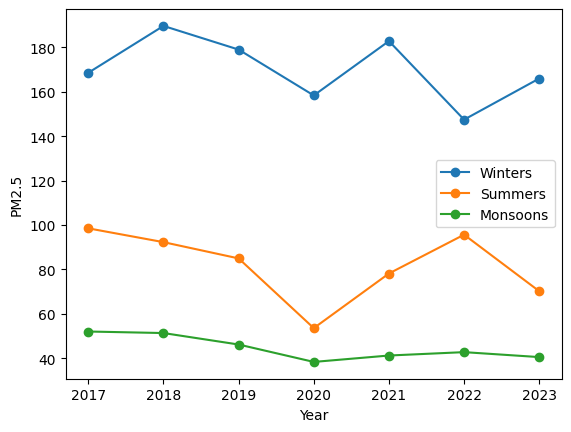

In [17]:
winters = [12,1,2]

delhi = data[data['state'] == 'Delhi']
delhi = delhi[delhi['Timestamp'].dt.year.between(2017,2023)]
#delhi_summers = delhi[delhi['Timestamp'].dt.month.isin(summers)]['PM2.5'].mean()
delhi_summers = delhi.loc[delhi['Timestamp'].dt.month.isin(summers), 'PM2.5'].groupby(delhi['Timestamp'].dt.year).mean()
delhi_monsoons = delhi.loc[delhi['Timestamp'].dt.month.isin(monsoon), 'PM2.5'].groupby(delhi['Timestamp'].dt.year).mean()
delhi_winters = delhi.loc[delhi['Timestamp'].dt.month.isin(winters) , 'PM2.5'].groupby(delhi['Timestamp'].dt.year).mean()

plt.plot(delhi_winters.index,delhi_winters, label='Winters' , marker = 'o')
plt.plot(delhi_summers.index,delhi_summers, label='Summers' , marker = 'o')
plt.plot(delhi_monsoons.index,delhi_monsoons, label='Monsoons' , marker = 'o')
plt.xlabel('Year')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

3) Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2017 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)

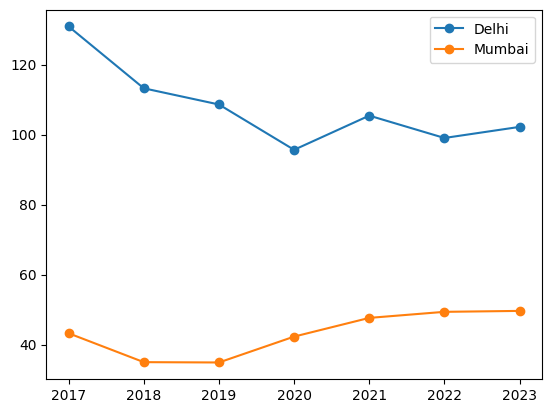

delhi's standard deviation = 11.717413923558443 and mumbai's is 6.271046653393212 
Delhi has more variation


In [18]:
# delhi defined above
mumbai = data[data['city'] == 'Mumbai']

mumbai = data.loc[(data['Timestamp'].dt.year.between(2017,2023)) & (data['city'] == 'Mumbai')]

mumbai = mumbai.groupby(mumbai['Timestamp'].dt.year)['PM2.5'].mean()
delhi = data.loc[(data['Timestamp'].dt.year.between(2017,2023)) & (data['city'] == 'Delhi')]
delhi  = delhi.groupby(delhi['Timestamp'].dt.year)['PM2.5'].mean()

plt.plot(delhi.index,delhi, label='Delhi' , marker = 'o')
plt.plot(mumbai.index,mumbai, label='Mumbai' , marker = 'o')
plt.legend()
plt.show()
delhistd = delhi.std()
mumstd = mumbai.std()
print(f"delhi's standard deviation = {delhistd} and mumbai's is {mumstd} ")
if delhistd > mumstd:
    print("Delhi has more variation")
else:        
    print("Mumbai has more variation")

Population-Based

1) Which state in India has the highest number of monitoring stations relative to its population? 

In [19]:
statedf_renamed = statedf.rename(columns={'State':'state'} , inplace = False)
grpdstates = data.groupby('state')
stationcount = grpdstates['station'].nunique()
print(stationcount)
stationcount = stationcount.reset_index()
mergeddf = pd.merge(statedf_renamed, stationcount, on='state')
mergeddf['ratio'] = mergeddf['station'] / mergeddf['Population']
print()
index = mergeddf['ratio'].idxmax()
print(mergeddf['state'][index])

state
Andhra Pradesh       13
Arunachal Pradesh     1
Assam                 9
Bihar                36
Chandigarh            3
Chhattisgarh         14
Delhi                40
Gujarat              17
Haryana              30
Himachal Pradesh      1
Jammu and Kashmir     1
Jharkhand             4
Karnataka            42
Kerala                9
Madhya Pradesh       29
Maharashtra          97
Manipur               2
Meghalaya             2
Mizoram               1
Nagaland              1
Odisha               19
Puducherry            1
Punjab                8
Rajasthan            46
Sikkim                1
Tamil Nadu           36
Telangana            14
Tripura               2
Uttar Pradesh        57
Uttarakhand           3
West Bengal          22
Name: station, dtype: int64

Chandigarh


2) Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

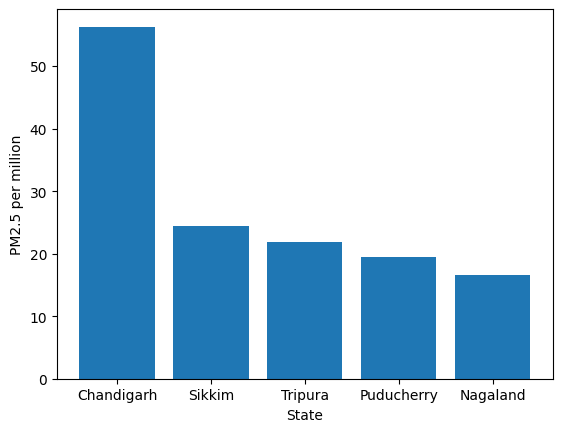

,state,PM2.5,Population,Area (km2),ratio
0,Andhra Pradesh,36.294259,49577103,162975,0.732077
1,Arunachal Pradesh,22.368565,1383727,83743,16.165447
2,Assam,59.685088,31205576,78438,1.912642
3,Bihar,77.647134,104099452,94163,0.745894
4,Chandigarh,59.414055,1055450,114,56.292629
5,Chhattisgarh,28.760103,25545198,135192,1.125852
6,Delhi,102.183923,16787941,1484,6.086745
7,Gujarat,51.507093,60439692,196024,0.852206
8,Haryana,67.117568,25351462,44212,2.647483
9,Himachal Pradesh,60.173842,6864602,55673,8.765817


In [20]:
data_2023 = data[data['Timestamp'].dt.year == 2023]
data_2023 = data_2023.groupby('state')['PM2.5'].mean()
mergeddf = pd.merge(data_2023, statedf_renamed, on='state')
mergeddf['ratio'] = mergeddf['PM2.5'] / mergeddf['Population'] * 10**6
mergeddf_top5 = mergeddf.iloc[mergeddf['ratio'].nlargest(5).index]
plt.bar(mergeddf_top5['state'], mergeddf_top5['ratio'])
plt.xlabel('State')
plt.ylabel('PM2.5 per million')
plt.show()
mergeddf

3) Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
X-axis: Population density (people per square kilometer).
Y-axis: Average PM2.5 concentration.
Use a scatter plot to show the relationship, where each point represents a state.

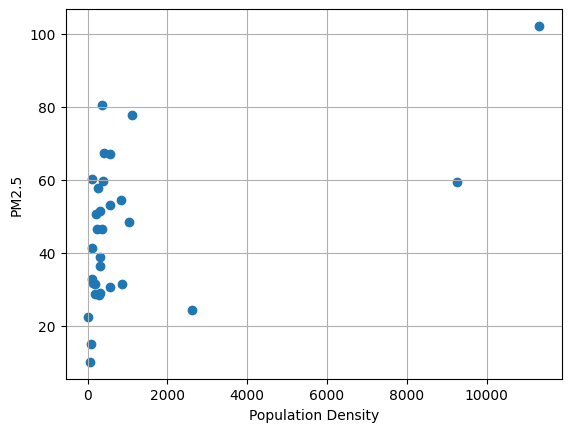

In [21]:
popdensity = mergeddf['Population'] / mergeddf['Area (km2)']
plt.scatter(popdensity, mergeddf['PM2.5'])
plt.xlabel('Population Density')
plt.ylabel('PM2.5')
plt.grid()
plt.show()

We can observe that very high population density may lead to higher pollution levels. But the overall trend does not show a clear linear relationship. So there might be other environmental and human factors playing a significant role in determining pollution levels.

Area Based

In [22]:
data = pd.read_csv('Data.csv')
statedf = pd.read_csv('State_data.csv')
funds = pd.read_csv('NCAP_Funding.csv')
funds = funds.replace('-',None)
funds['Amount released during FY 2021-22'] = funds['Amount released during FY 2021-22'].astype(float)
funds['Amount released during FY 2020-21'] = funds['Amount released during FY 2020-21'].astype(float)
funds['Amount released during FY 2019-20'] = funds['Amount released during FY 2019-20'].astype(float)
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d')

1. Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
a) X-axis: States.
b) Y-axis: PM2.5 concentration per square kilometer.
c) Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.

Delhi


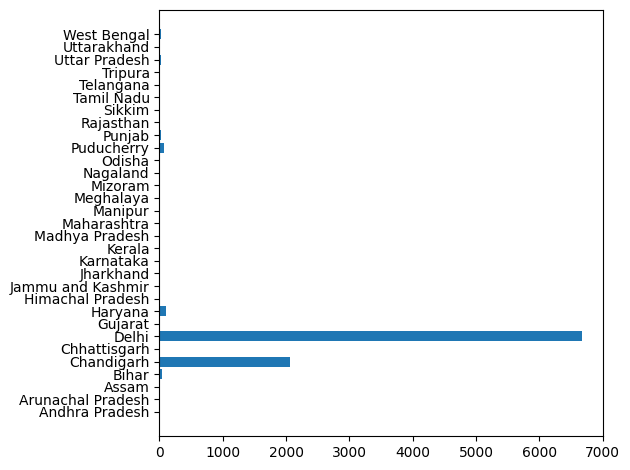

In [23]:
a = data.groupby(['state'])['PM2.5'].sum()
c = statedf.groupby(['State'])['Area (km2)'].sum()
d = a/c
print(d.idxmax())
fig,ax = plt.subplots()
ax.barh(d.index,d.values)
fig.tight_layout()
plt.show()

2) Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.


Delhi


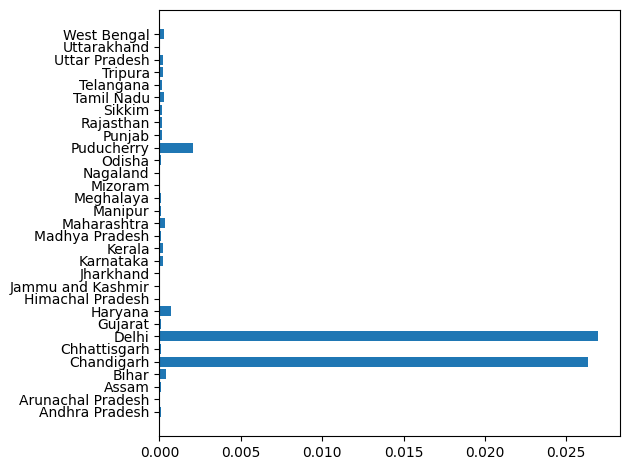

In [24]:
a = data.groupby(['state'])['station'].nunique()
c = statedf.groupby(['State'])['Area (km2)'].sum()
d = a/c
print(d.idxmax())
fig,ax = plt.subplots()
ax.barh(d.index,d.values)
fig.tight_layout()
plt.show()


3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

In [25]:
mask = data[(data['Timestamp'] >= '2021-01-01') & (data['Timestamp'] <= '2021-12-31')&((data['state'] == 'Maharashtra') | (data['state'] == 'Madhya Pradesh'))]
b = statedf[statedf['State']=='Maharashtra']['Population']
b2 = statedf[statedf['State']=='Madhya Pradesh']['Population']
a = (mask.groupby(['state'])['PM2.5'].mean())
print("The state with the higher PM2.5 value is", a.index[a.argmax()])
print("The state with higher population densoty is", 'Maharashtra' if b2.values>b.values else'Madhya Pradesh')

The state with the higher PM2.5 value is Madhya Pradesh
The state with higher population densoty is Madhya Pradesh


We can see that here the more populated and polluted state is Maharashtra. This tells us that for genrally there will be more pollution in where more people live 

Funding Based

1) Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [26]:

a = funds.groupby(['State'])['Amount released during FY 2021-22'].sum()
a = pd.DataFrame({'State':a.index, 'Amount released during FY 2021-22':a.values})
c = a[a['Amount released during FY 2021-22']!=0]
b = a[a['Amount released during FY 2021-22']==0]
d1 = (data.groupby(['state'])['PM2.5'].sum())/12
d1 = pd.DataFrame({'State':d1.index, 'PM2.5':d1.values})
d2 = (pd.merge(d1, c, how = 'inner', on = 'State')).sum()
d3 = (pd.merge(d1, b,how = 'inner', on = 'State')).sum()
if (d2.iat[1])>(d3.iat[1]):
    print("States with NCAP funding have more PM2.5 values.")
else:
    print("States with NCAP funding have more PM2.5 values.")

States with NCAP funding have more PM2.5 values.


2) Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. 
Has an increment of the financing led to noticeable improvements in air quality?

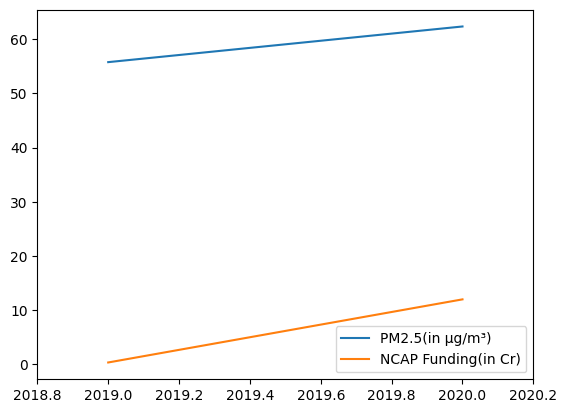

In [27]:
df = data[data['state']=='Assam']
df1 = df[df['Timestamp'].dt.year == 2019]
df2 = df[df['Timestamp'].dt.year == 2020]
a = df1['PM2.5'].mean()
b = df2['PM2.5'].mean()
fund = funds[funds['State']=='Assam']
c = fund.groupby(['State'])['Amount released during FY 2019-20'].sum()
d = fund.groupby(['State'])['Amount released during FY 2020-21'].sum()
fig, ax = plt.subplots()
ax.plot([2019,2020],[a,b],label='PM2.5(in µg/m³)')
ax.plot([2019,2020],[c.values,d.values],label='NCAP Funding(in Cr)')
ax.legend()
plt.xlim(2018.8,2020.2)
plt.show()


No, the increment in funding has not led to an increase in th equality of air.

3) Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.

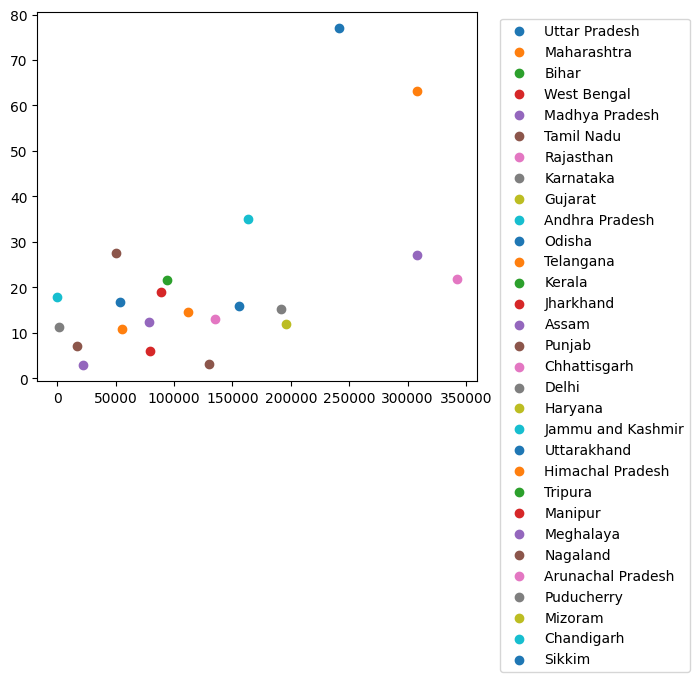

In [28]:
a = funds.groupby(['State'])['Total fund released'].sum()
b = statedf.copy()
a1 = pd.DataFrame({'State':a.index, 'Total fund released':a.values})
df = pd.merge(b, a1, on='State', how='left')
fig,ax = plt.subplots(figsize= (8,6))
for i in range(len(df.index)):
    ax.scatter(df.iloc[i]['Area (km2)'], df.iloc[i]['Total fund released'], label = df.iloc[i]['State'])
ax.legend(bbox_to_anchor=(1.5, 1.0), loc='upper right')
fig.tight_layout()
plt.show()

Miscellaneous Questions 

1) For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [29]:

df = data.loc[(data['Timestamp'] >= '2023-1-1') & (data['Timestamp'] <= '2023-12-31')]
a = df.groupby(['city'])['PM2.5'].sum()
b = a.idxmax()
df = df[df['city']==b]
a = df.groupby(['Timestamp'])['PM2.5'].mean()
a = pd.DataFrame({'Timestamp':a.index , 'PM2.5':a.values})
a = a[a['PM2.5']>300]
print("The most poluted city is",b)
print("The days with PM2.5 vales were above the hazardous threshold are", (len(a.index)/365)*100)

The most poluted city is Delhi
The days with PM2.5 vales were above the hazardous threshold are 3.0136986301369864


2) Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

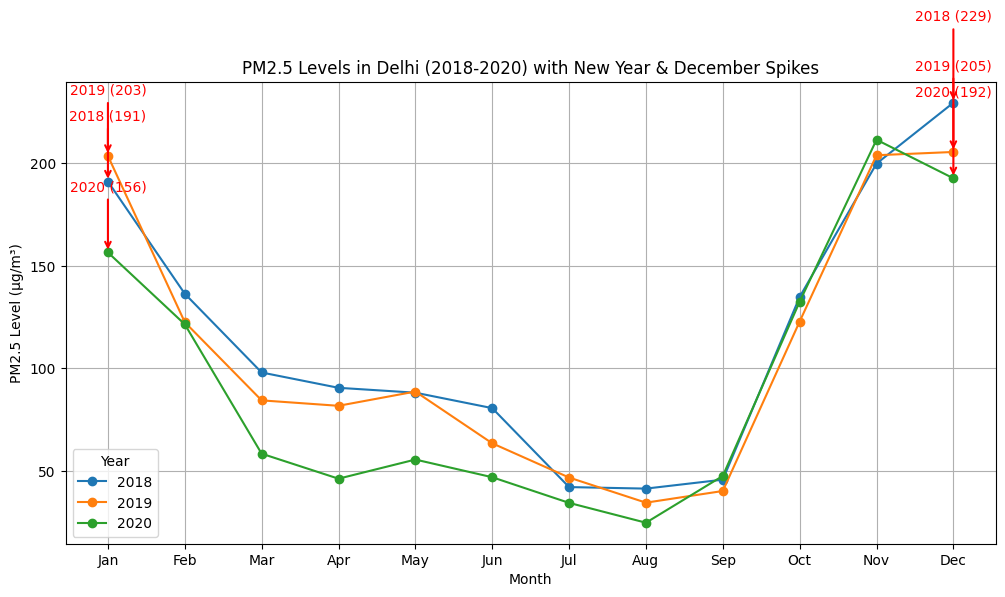

In [30]:
pm25_df = pd.read_csv("data.csv")
pm25_df["Timestamp"] = pd.to_datetime(pm25_df["Timestamp"])
pm25_df["Year"] = pm25_df["Timestamp"].dt.year
pm25_df["Month"] = pm25_df["Timestamp"].dt.month
pm25_df["Day"] = pm25_df["Timestamp"].dt.day
pm25_delhi = pm25_df[pm25_df["state"] == "Delhi"]

monthly_avg_pm25 = pm25_delhi.groupby(["Year", "Month"])["PM2.5"].mean().reset_index()
new_year_months = [1]
diwali_months = [10, 11]
winter_spike_months = [12]

spike_points = []
for year in [2018, 2019, 2020]:
        winter_avg = monthly_avg_pm25[
        (monthly_avg_pm25["Year"] == year) & (monthly_avg_pm25["Month"].isin(winter_spike_months + new_year_months))]["PM2.5"].mean()
        yearly_avg = monthly_avg_pm25[monthly_avg_pm25["Year"] == year]["PM2.5"].mean()
        for month in [12, 1]:
            monthly_pm25 = monthly_avg_pm25[
            (monthly_avg_pm25["Year"] == year) & (monthly_avg_pm25["Month"] == month)]["PM2.5"].mean()
            if monthly_pm25 > yearly_avg * 1.2:
               spike_points.append((year, month, monthly_pm25))

plt.figure(figsize=(12, 6))
for year in [2018, 2019, 2020]:
    yearly_data = monthly_avg_pm25[monthly_avg_pm25["Year"] == year]
    plt.plot(yearly_data["Month"], yearly_data["PM2.5"], marker="o", label=f"{year}")
for year, month, pm25_value in spike_points:
    offset = 40 if month == 12 else 30
    plt.annotate(
        f"{year} ({int(pm25_value)})",
        xy=(month, pm25_value),
        xytext=(month, pm25_value + offset),
        arrowprops=dict(arrowstyle="->", color="red", lw=1.5),
        fontsize=10,
        color="red",
        ha="center"
    )
plt.xlabel("Month")
plt.ylabel("PM2.5 Level (µg/m³)")
plt.title("PM2.5 Levels in Delhi (2018-2020) with New Year & December Spikes")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.grid()
plt.show()

3) Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends

The state which recived the highest NCAP Funding in 2023 is Andhra Pradesh


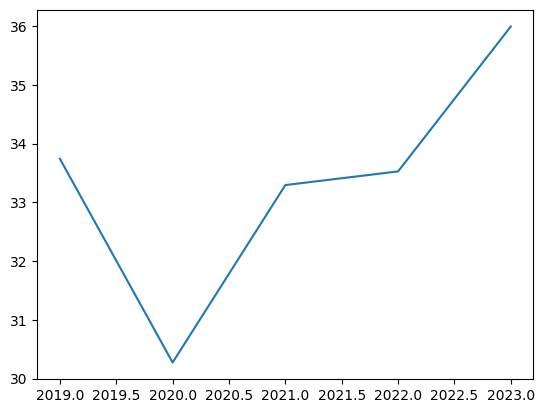

In [31]:
a = funds.groupby(['State'])['Amount released during FY 2020-21'].sum()
b = a.idxmax()
print("The state which recived the highest NCAP Funding in 2023 is",b)
c = data[data['state']==b]
l=[]
fig,ax = plt.subplots()
for i in range(2019,2024):
    d = c[c['Timestamp'].dt.year == i]
    d = d.groupby(['Timestamp'])['PM2.5'].mean()
    l.append(((d.values).mean()))
ax.plot(np.arange(2019,2024),l)
plt.show()

4) Draw the map of India and plot the sensor locations on the map

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


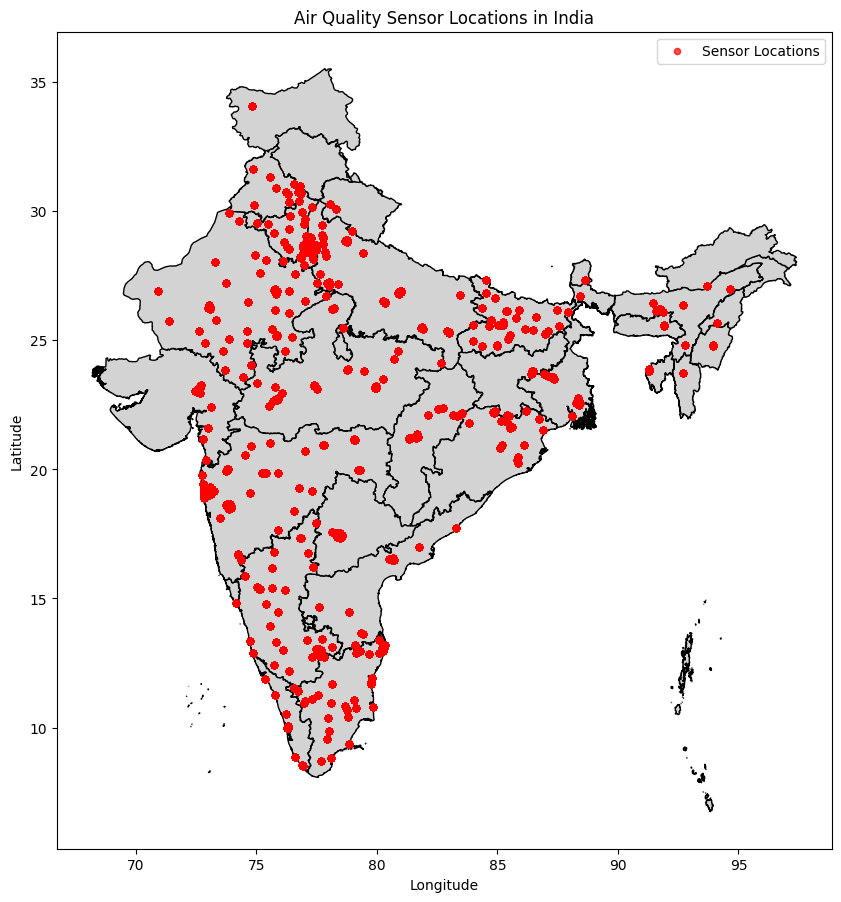

In [32]:
import geopandas as gpd
india_map = gpd.read_file("india_state.geojson.json")
df = pd.read_csv("data.csv")

fig, ax = plt.subplots(figsize=(10, 12))
india_map.plot(ax=ax, color="lightgrey", edgecolor="black")

plt.scatter(df["longitude"], df["latitude"], color="red", s=20, label="Sensor Locations", alpha=0.7)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Air Quality Sensor Locations in India")
plt.legend()
plt.show()

Tell us something new 

1) Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymaker

Through this dataset we know that
1) In the dataset we find many NaN values which signifies that many station for monitoring air polllution ar enot working properly, hence policymaker can look forward in this direction.
2) We find the impact of Covid-19 on air pollution, where we observe that the polltuion levels had dropped for all states due to lockdown imposed in the country.
3) We also observe that NCAP funds to the states are also not regular yearwise as we observe that for some years some states did not recived any funds which is a matter of concern. 